In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,log_loss,precision_score,recall_score,jaccard_score,hamming_loss,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from keras.models import load_model
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
df = pd.read_csv('MI.data',na_values='?')
column_names = ['ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K', 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
df.columns=column_names

for col in df.columns:
  if(df[col].isin([0,1,2,3,4,5,np.nan]).all()):
    df[col]=df[col].fillna(df[col].mode()[0])
  else:
    df[col]=df[col].fillna(df[col].median())


x=df.iloc[:,2:75]
y=df.iloc[:,123]

features=['SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL',
       'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02',
       'nr_03', 'nr_04', 'np_05', 'np_08', 'np_10', 'endocr_02', 'zab_leg_01',
       'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG',
       'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'K_SH_POST', 'MP_TP_POST',
       'SVT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im',
       'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_07',
       'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_05',
       'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_p_ecg_p_03', 'n_p_ecg_p_08',
       'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12']


x=x[features]

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
# model=DecisionTreeClassifier(criterion='gini', random_state=42)
# model.fit(x_train,y_train)
# svc = SVC(probability=True)  # Set probability to True for predict_proba
# model=OneVsRestClassifier(svc)
# model.fit(x_train, y_train)
# model=SGDClassifier(loss = 'log')
# model.fit(x_train,y_train)

# model=GaussianNB()
# model.fit(x_train,y_train)



model = load_model('LSTM3_52feat_160epochs.keras')


In [ ]:
y_pred=model.predict(x_test)

yp=[]

print(y_pred)

for i in range(len(y_pred)):
  mx=max(y_pred[i])
  for j in range(len(y_pred[0])):
    if (y_pred[i][j]==mx):
      yp.append(j)

yt=[]
print(yp)
for i in y_test:
  yt.append(int(i))

print(yt)

72/72 [==============================] - 3s 17ms/step
[[9.1060400e-01 1.2237612e-11 2.3385310e-27 ... 3.9878320e-29
  4.7910504e-22 1.5771675e-16]
 [3.2473213e-04 9.9967277e-01 3.2497097e-17 ... 1.1068443e-24
  6.7109138e-11 2.4961980e-06]
 [1.1727689e-13 5.2588610e-14 0.0000000e+00 ... 5.0841350e-38
  0.0000000e+00 9.9999994e-01]
 ...
 [2.6686868e-07 1.4021320e-14 4.8907637e-23 ... 1.3316777e-19
  5.7054059e-20 4.8305647e-13]
 [5.5977944e-07 1.6219368e-11 9.9999940e-01 ... 1.4814820e-15
  3.6580652e-32 5.1576643e-14]
 [1.0000000e+00 4.7348817e-33 0.0000000e+00 ... 0.0000000e+00
  2.8405624e-31 7.2617713e-38]]
[0, 1, 7, 3, 1, 4, 7, 6, 6, 3, 3, 7, 1, 2, 6, 6, 6, 2, 2, 4, 1, 4, 1, 0, 7, 7, 3, 2, 6, 2, 0, 0, 1, 2, 0, 1, 7, 1, 4, 7, 5, 1, 0, 0, 7, 6, 4, 6, 0, 5, 4, 6, 2, 6, 6, 5, 3, 3, 2, 6, 3, 0, 1, 6, 4, 4, 0, 2, 7, 6, 1, 6, 5, 4, 2, 4, 1, 6, 2, 4, 2, 5, 0, 4, 1, 7, 7, 5, 3, 4, 3, 5, 7, 2, 4, 3, 3, 5, 0, 3, 5, 3, 6, 5, 3, 6, 7, 3, 5, 1, 1, 2, 6, 1, 2, 5, 5, 5, 7, 0, 3, 6, 1, 0, 6, 4, 5, 

In [ ]:
#y_pred=model.predict(x_test)
y_pred=yp
y_test=yt
acc=accuracy_score(y_test,y_pred)
print(acc)

0.987308533916849


In [ ]:
y_pred_prob=model.predict(x_test)
lb = LabelBinarizer()
y_test_encoded = lb.fit_transform(y_test)

logloss=log_loss(y_test_encoded,y_pred_prob)
print(logloss)

72/72 [==============================] - 1s 13ms/step
0.05049271150862781


In [ ]:
jacc=jaccard_score(y_test,y_pred,average='macro')
print(jacc)

0.9757567891367045


In [ ]:
HammLoss=hamming_loss(y_test,y_pred)
print(HammLoss)

0.012691466083150985


In [ ]:
c_report=classification_report(y_test,y_pred)
print(c_report)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       294
           1       0.96      0.98      0.97       294
           2       0.99      1.00      1.00       319
           3       0.97      1.00      0.98       280
           4       1.00      1.00      1.00       272
           5       1.00      1.00      1.00       271
           6       1.00      1.00      1.00       286
           7       1.00      1.00      1.00       269

    accuracy                           0.99      2285
   macro avg       0.99      0.99      0.99      2285
weighted avg       0.99      0.99      0.99      2285



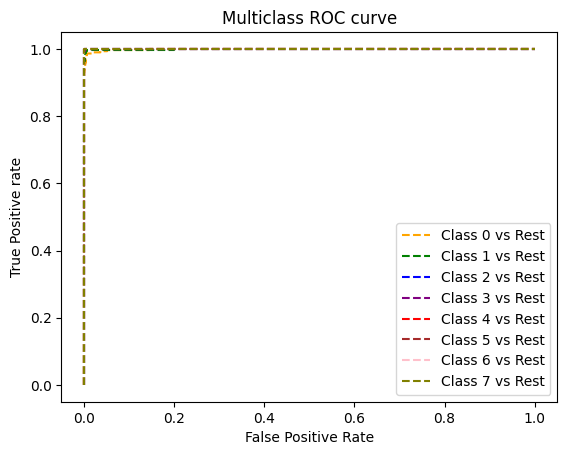

In [ ]:
fpr={}
tpr={}
thresh={}

for i in range(8):
  fpr[i],tpr[i],thresh[i]=roc_curve(y_test,y_pred_prob[:,i],pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='purple', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='brown', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='pink', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='olive', label='Class 7 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [ ]:
roc_auc=roc_auc_score(y_test_encoded,y_pred_prob,average='macro',multi_class='ovo')
print(roc_auc)

0.9996994994537189
